<h1>1. Generating Random Networks</h1>

In [2]:
library('igraph')

<h2>2a</h2>

Connected:  TRUE
Diameter of network:  24


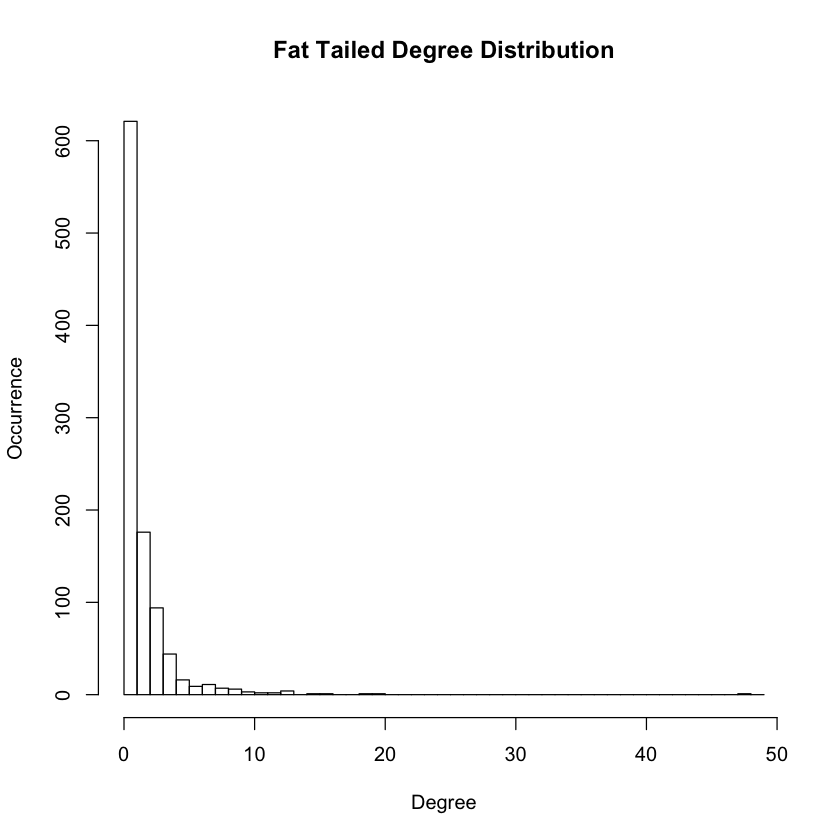

In [163]:
n = 1000
m = 1
network <- sample_pa(n=n, m=m, directed=FALSE)
#network <- barabasi.game(n, m, directed=FALSE)
writeLines(paste("Connected: ", is.connected(network)))
degree_distribution <- degree(network)
hist(degree_distribution, breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 1), xlab="Degree",ylab="Occurrence", main="Fat Tailed Degree Distribution")
writeLines(paste("Diameter of network: ", diameter(network)))

<h2>2b</h2>

In [147]:
cluster <- clusters(network)
dg <- decompose.graph(network)
gcc = dg[[1]]
community_structure <- fastgreedy.community(gcc)
modularity <- modularity(community_structure)
writeLines(paste("Modularity: ", modularity))

Modularity:  0.92940638336034


<h2>2c</h2>

In [164]:
n = 10000
larger_network <- sample_pa(n=n, m=m, directed=FALSE)
#larger_network <- barabasi.game(n, m, directed=FALSE)
larger_cluster <- clusters(larger_network)
larger_dg <- decompose.graph(larger_network)
larger_gcc = larger_dg[[1]]
larger_community_structure <- fastgreedy.community(larger_gcc)
larger_modularity <- modularity(larger_community_structure)
writeLines(paste("Modularity: ", larger_modularity))

Modularity:  0.978560462306869


<h2>2d</h2>

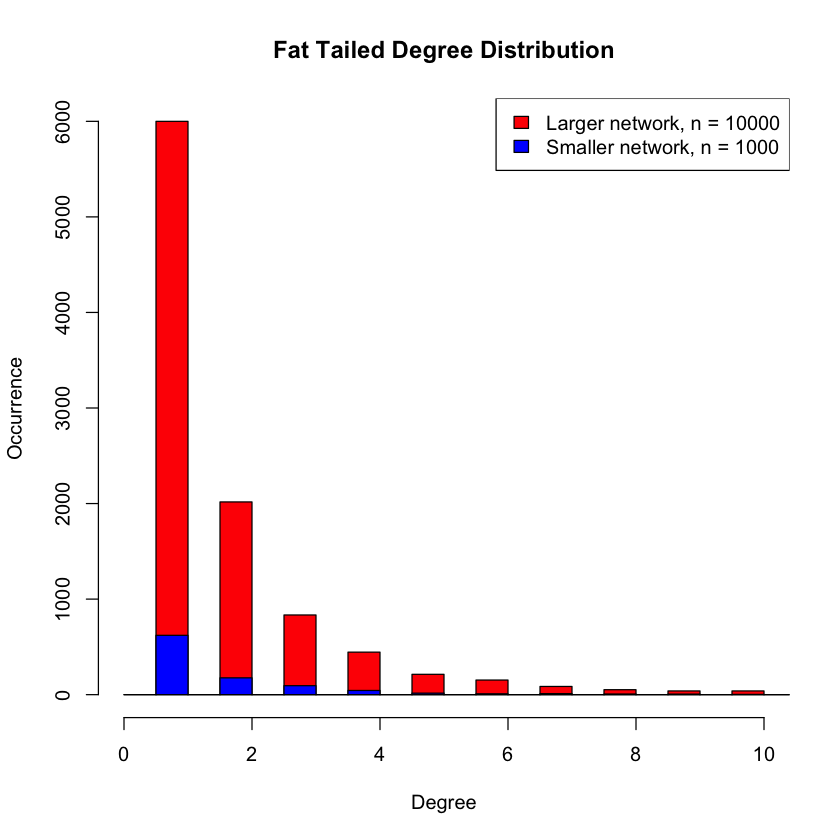

In [165]:
degree_distribution_larger <- degree(larger_network)
histogram_larger = hist((degree_distribution_larger), col="red", breaks = seq(from = 0, to = max(degree_distribution_larger) + 1, by = 0.5), xlim=c(0,10), xlab="Degree",ylab="Occurrence", main="Fat Tailed Degree Distribution")
histogram = hist((degree_distribution), col="blue", breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 0.5), xlab="Degree",ylab="Occurrence", add=TRUE, main="Fat Tailed Degree Distribution")
legend("topright", legend=c("Larger network, n = 10000", "Smaller network, n = 1000"), fill=c("red", "blue"))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“80 y values <= 0 omitted from logarithmic plot”

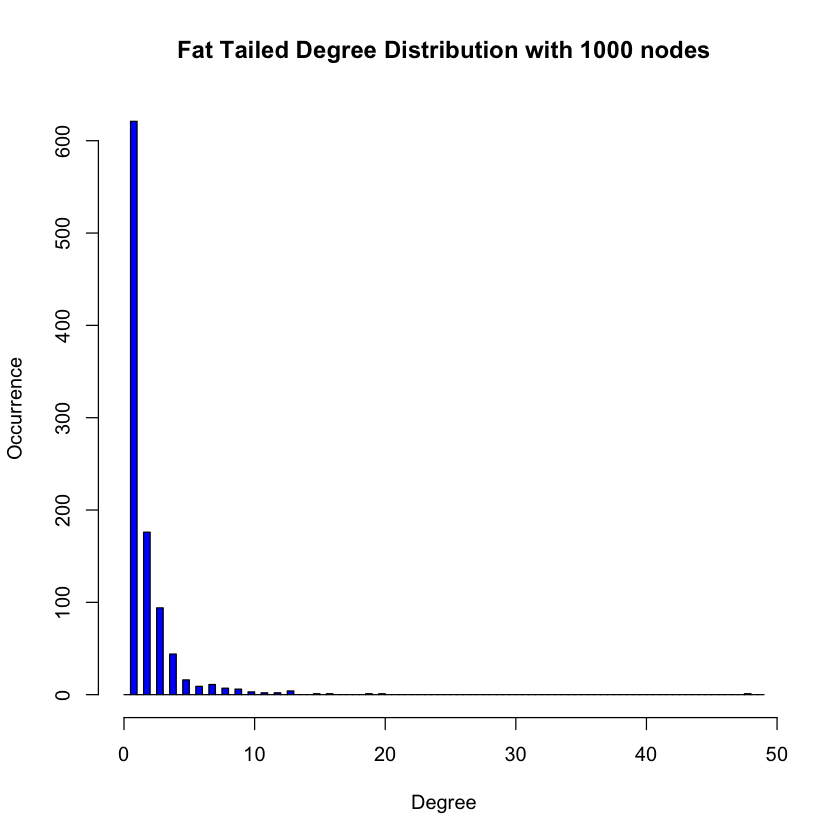

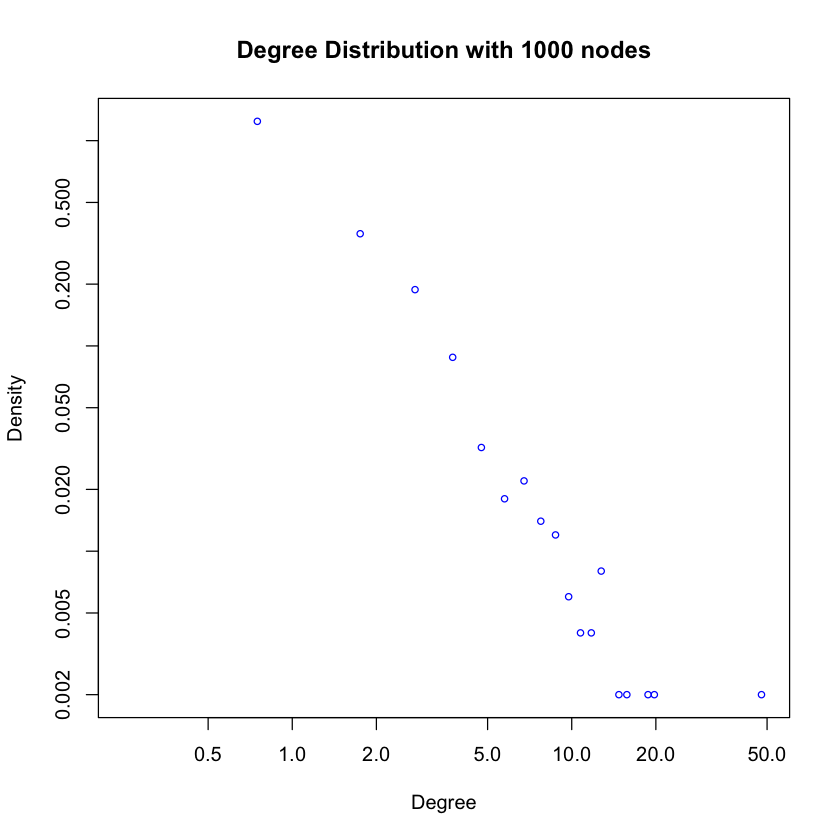

In [166]:
histogram = hist((degree_distribution), col="blue", breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 0.5), xlab="Degree",ylab="Occurrence", main="Fat Tailed Degree Distribution with 1000 nodes")
x1 = data.frame(x = (histogram$mids), y = (histogram$density))
plot(x1, type = "o", col="blue", main = "Degree Distribution with 1000 nodes", xlab = "Degree", ylab = "Density", log="xy", cex=0.7)
#lines(stats::lowess(x1))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“105 y values <= 0 omitted from logarithmic plot”

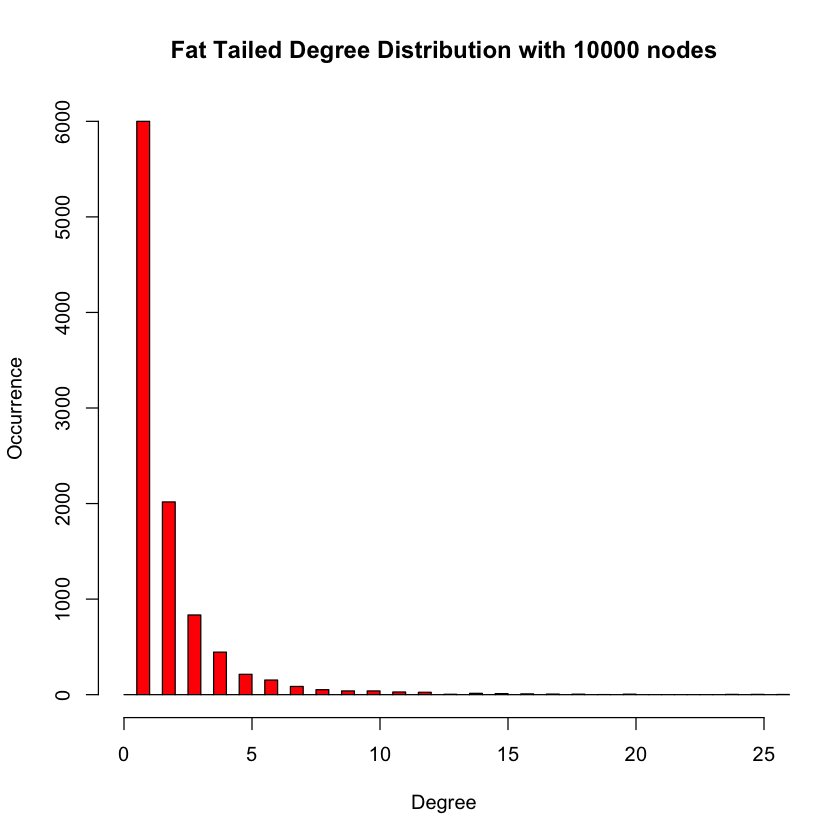

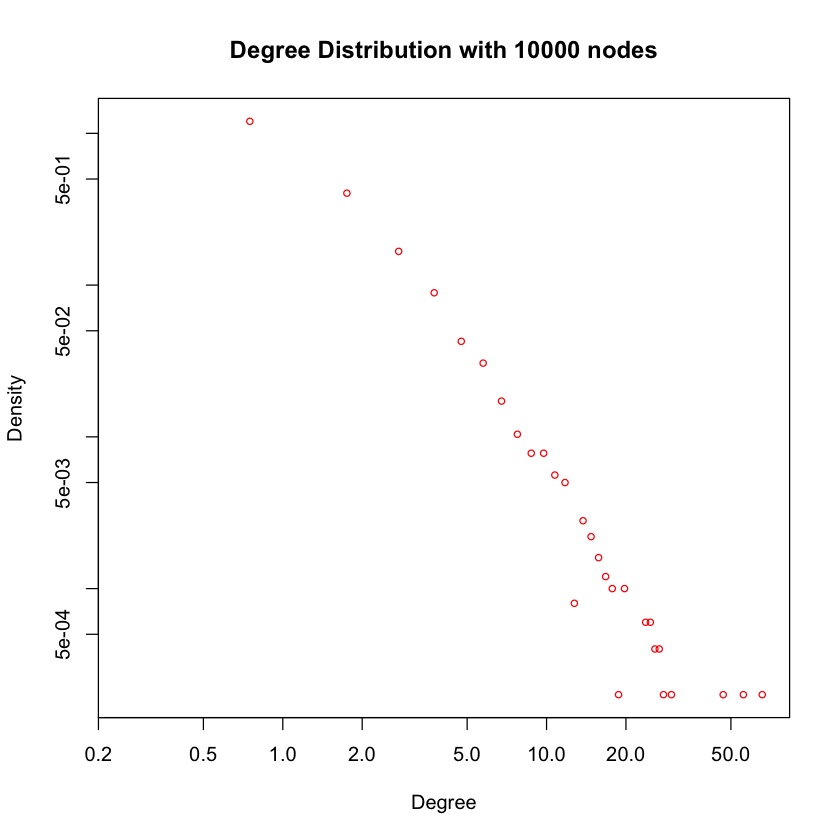

In [167]:
degree_distribution_larger <- degree(larger_network)
histogram_larger = hist((degree_distribution_larger), col="red", breaks = seq(from = 0, to = max(degree_distribution_larger) + 1, by = 0.5), xlim=c(0,25), xlab="Degree",ylab="Occurrence", main="Fat Tailed Degree Distribution with 10000 nodes")
x2 = data.frame(x = (histogram_larger$mids), y = (histogram_larger$density))
plot(x2, type = "o", col="red", main = "Degree Distribution with 10000 nodes", xlab = "Degree", ylab = "Density", log="xy", cex=0.7)
#lines(stats::lowess(x2))

<h2>2e</h2>

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“80 y values <= 0 omitted from logarithmic plot”

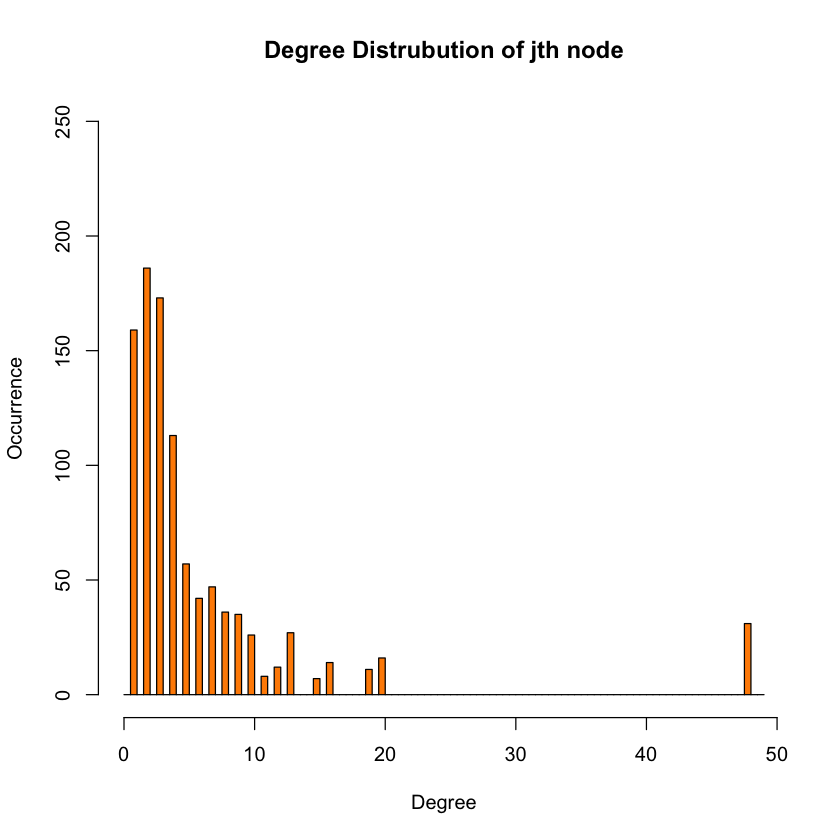

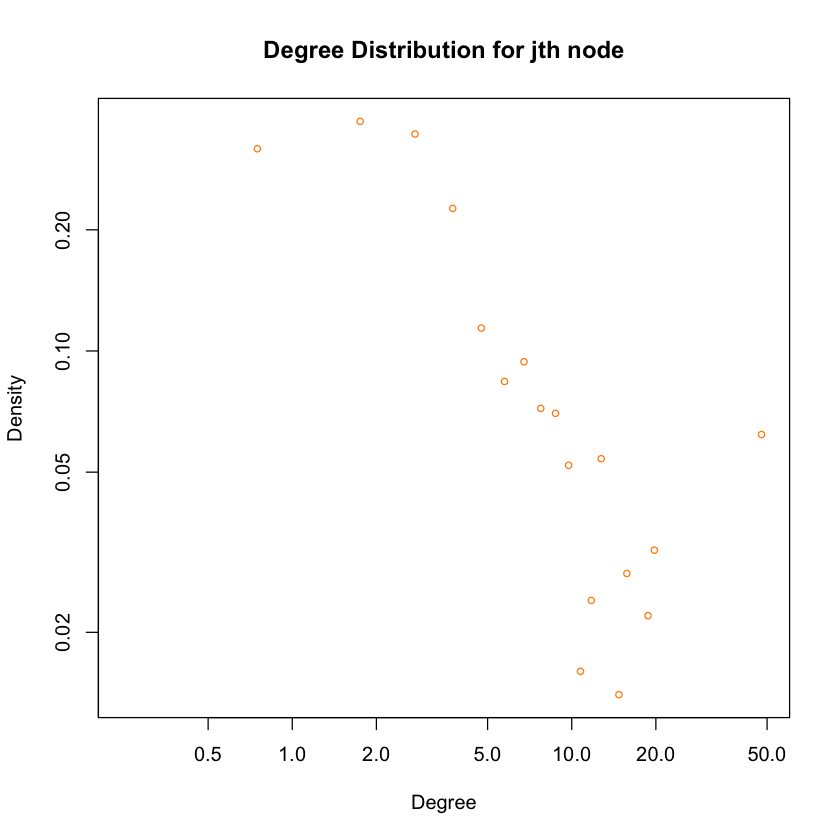

In [177]:
deg_nj <- numeric()
for (i in 1:1000) {
    #random generate a number within 1000
    n_i <- sample(1000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    deg_nj <- c(deg_nj, degree(network, n_j))
    
}
histogram_j = hist(deg_nj, col="darkorange", breaks = seq(from = 0, to = max(deg_nj) + 1, by = 0.5), ylim=c(0,250), xlab="Degree", ylab="Occurrence", main="Degree Distrubution of jth node")
x3 = data.frame(x = (histogram_j$mids), y = (histogram_j$density))
plot(x3,col="darkorange", main = "Degree Distribution for jth node", xlab = "Degree", ylab = "Density", log="xy", type = "o", cex=0.7)
#lines(stats::lowess(x3))

<h2>2f</h2>

In [179]:
# The maximum degree for graph with different aging exponents
g1 <- aging.prefatt.game(1000, pa.exp=1, aging.exp=0, aging.bin=1000)
g2 <- aging.prefatt.game(1000, pa.exp=1, aging.exp=-1,   aging.bin=1000)
g3 <- aging.prefatt.game(1000, pa.exp=1, aging.exp=-3,   aging.bin=1000)
max(degree(g1))
max(degree(g2))
max(degree(g3))

[1] 57

[1] 14

[1] 5

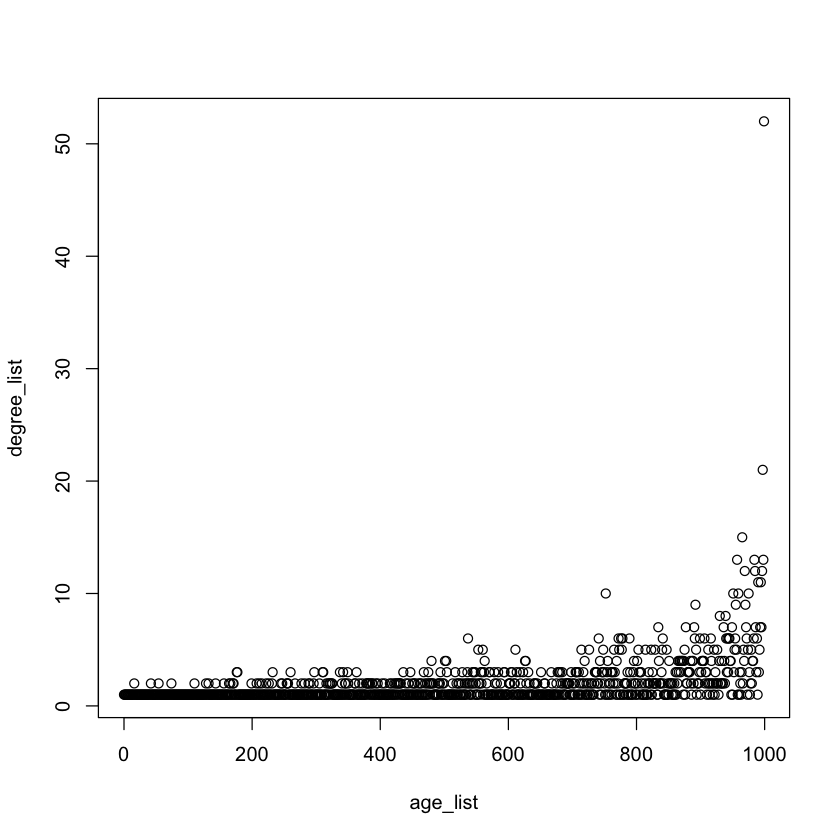

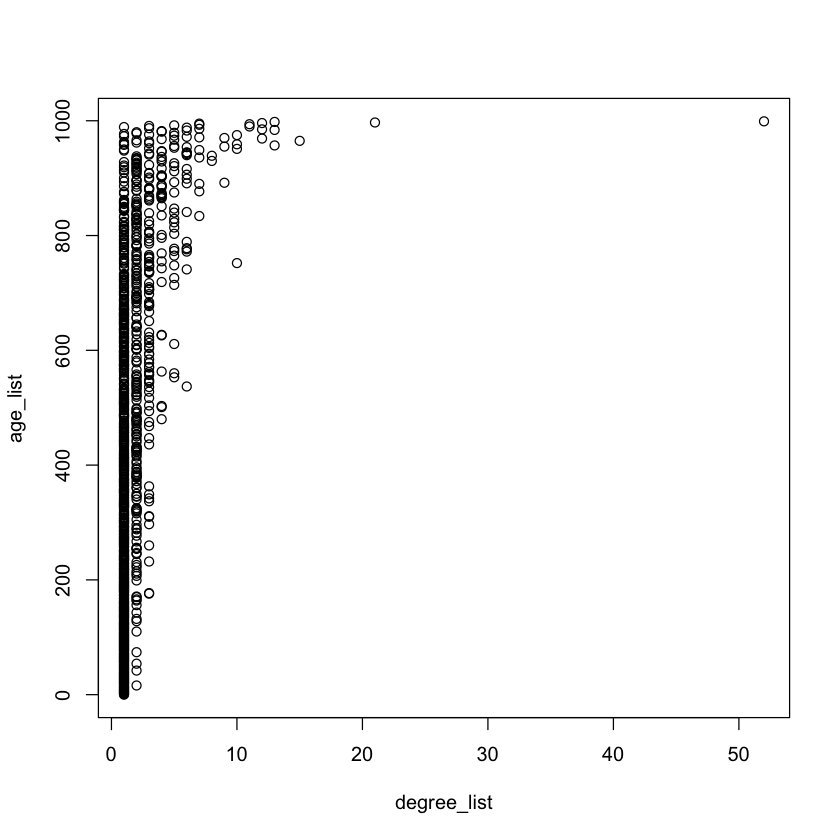

In [184]:
n = 1000
m = 1
network <- barabasi.game(n, m, directed=FALSE)
age_list <- list()
degree_list <- degree(network)
for (i in 1:1000) {
    age_list[i] = n - i
    #degree_list[i] = degree(network)[i]
}
plot(age_list, degree_list)
plot(degree_list, age_list)

<h2>2g</h2>

<h3>m = 2</h3>

<h3>m = 3</h3>

<h2>2h</h2>

Modularity of network1:  0.928988047106167
Diameter of network1:  19
Diameter of gcc1:  19
Nodes in network1:  1000
Nodes in gcc1:  1000


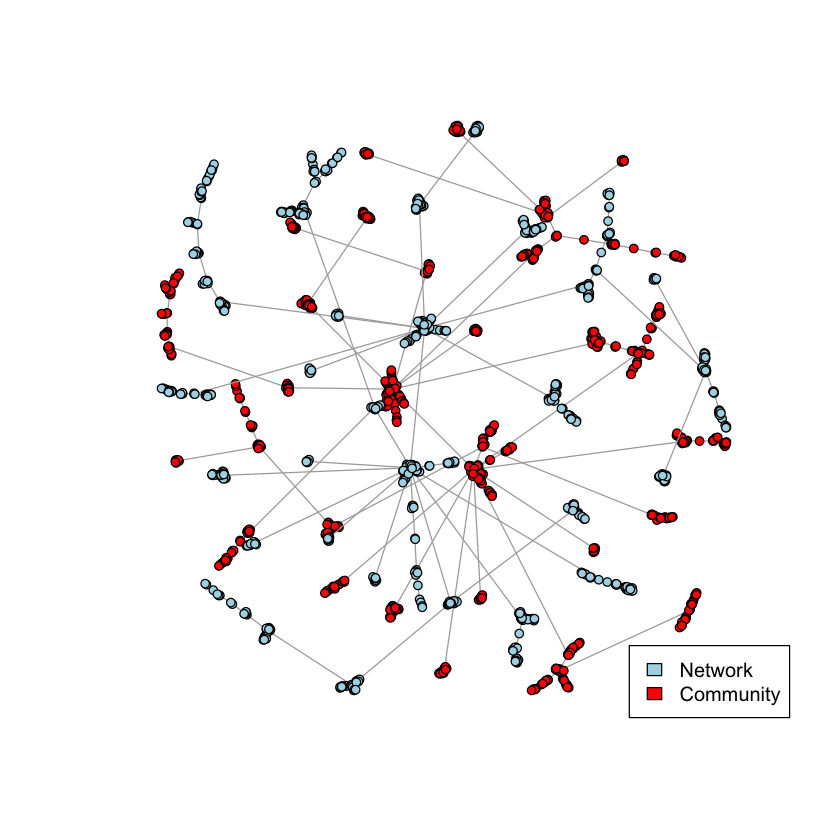

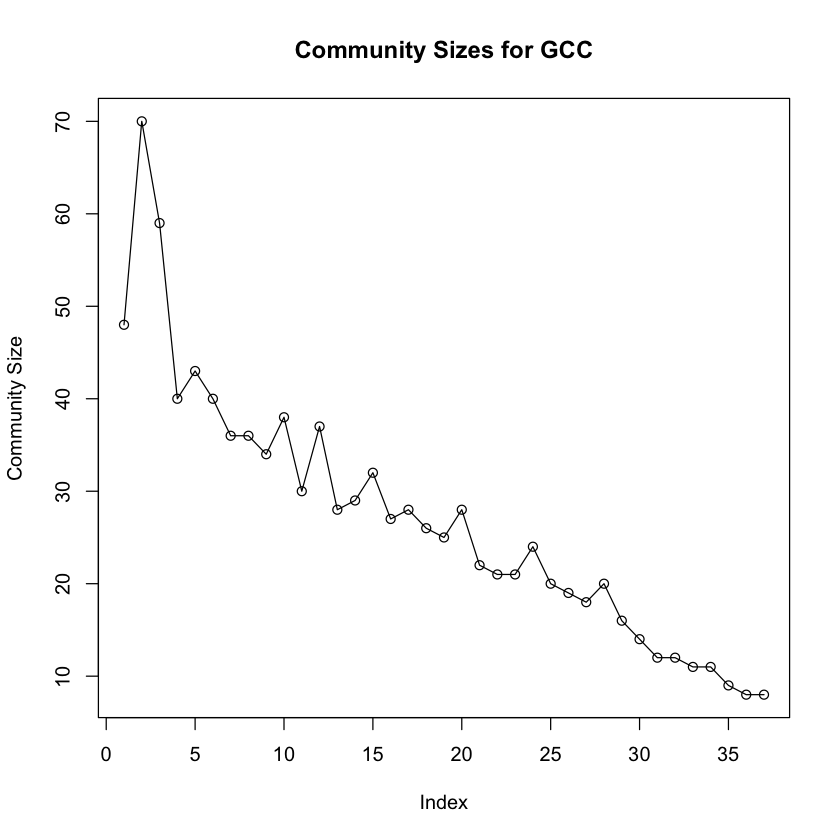

In [174]:
n = 1000
m = 1
#network1 <- sample_pa(n=n, m=m, directed=FALSE)
network1 <- barabasi.game(n, m, directed=FALSE)
deg1 <- degree(network1)
cluster1 <- clusters(network1)
dg1 <- decompose.graph(network1)
gcc_index <- which.max(sapply(dg1,vcount))
gcc1 <- dg1[[gcc_index]]
vtx<-vcount(gcc)
#print(gcc_index)

#gcc1 = dg1[[1]]
community_structure1 <- fastgreedy.community(gcc1)
modularity1 <- modularity(community_structure1)
writeLines(paste("Modularity of network1: ", modularity1))
writeLines(paste("Diameter of network1: ", diameter(network1)))
writeLines(paste("Diameter of gcc1: ", diameter(gcc1)))
writeLines(paste("Nodes in network1: ", length(V(network1))))
writeLines(paste("Nodes in gcc1: ", length(V(gcc1))))

#plot( g_p, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
plot( gcc1, vertex.size=3, vertex.label=NA, vertex.color="red", edge.arrow.size=0 )
plot(network1, vertex.size=3, vertex.label=NA, vertex.color="lightblue", edge.arrow.size=0, add=TRUE)
legend("bottomright", legend=c("Network", "Community"), fill=c("lightblue", "red"))

cm_size1 <- as.vector(sizes(community_structure1))
plot(cm_size1,main="Community Sizes for GCC",xlab="Index",ylab="Community Size")
lines(cm_size1)

Modularity of network2:  0.808735670382063
Diameter of network2:  16
Diameter of gcc2:  16
Nodes in network2:  1000
Nodes in gcc2:  708


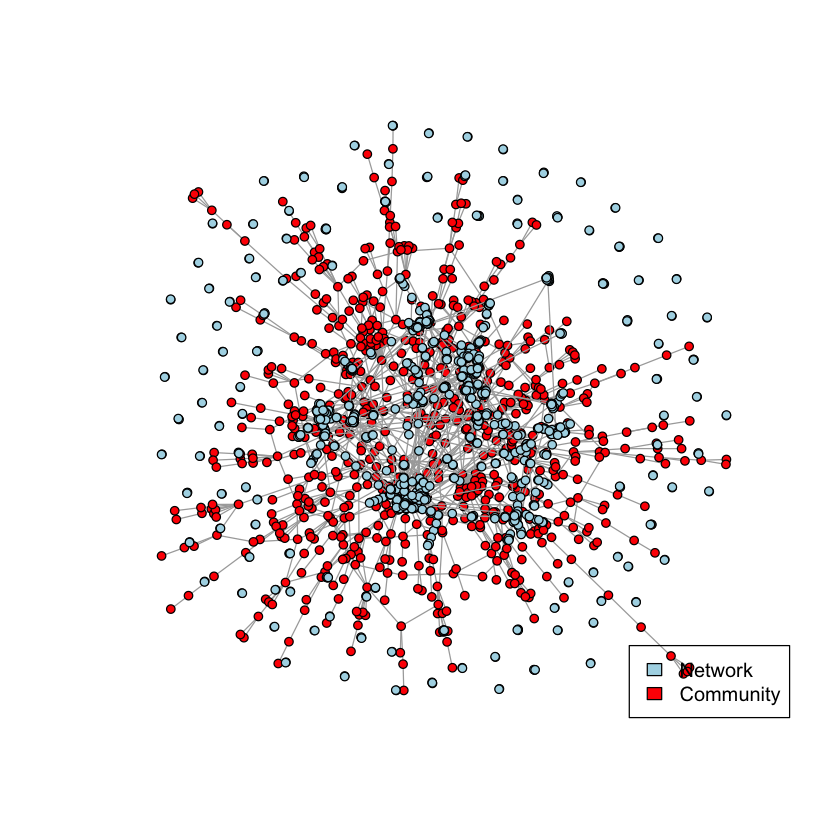

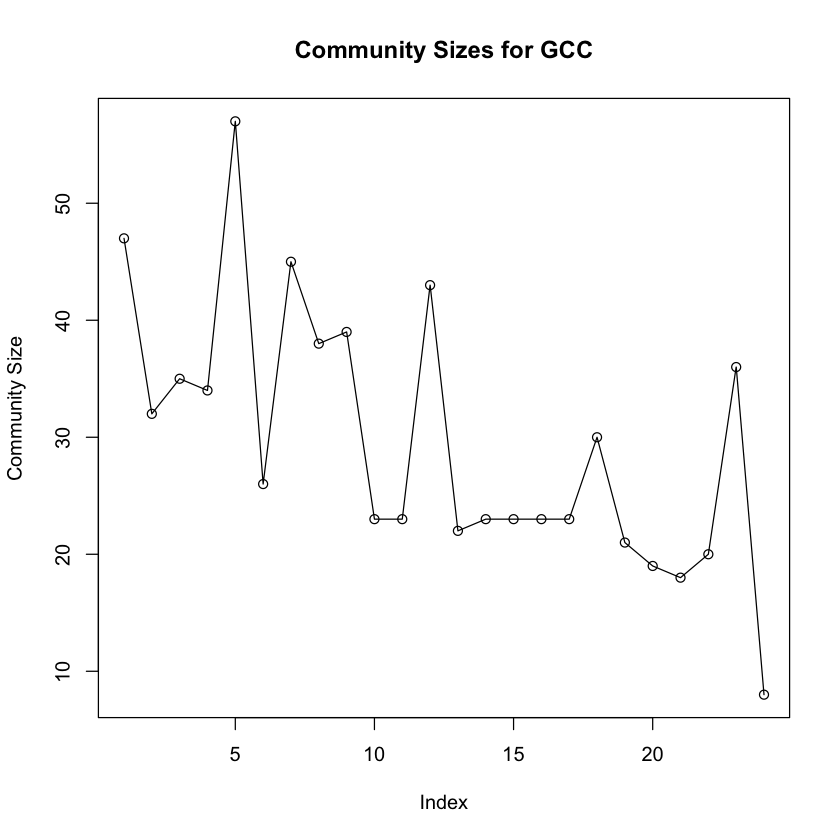

In [175]:
#network2 <- sample_pa(n=n, out.seq=deg1, directed=FALSE)
network2 <- degree.sequence.game(out.deg=deg1, method = "simple.no.multiple")
cluster2 <- clusters(network2)
dg2 <- decompose.graph(network2)
gcc_index <- which.max(sapply(dg2,vcount))
gcc2 <- dg2[[gcc_index]]
vtx<-vcount(gcc)
#print(gcc_index)

#gcc1 = dg1[[1]]
community_structure2 <- fastgreedy.community(gcc2)
modularity2 <- modularity(community_structure2)
writeLines(paste("Modularity of network2: ", modularity2))
writeLines(paste("Diameter of network2: ", diameter(network2)))
writeLines(paste("Diameter of gcc2: ", diameter(gcc2)))
writeLines(paste("Nodes in network2: ", length(V(network2))))
writeLines(paste("Nodes in gcc2: ", length(V(gcc2))))

#plot( g_p, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
plot( gcc2, vertex.size=3, vertex.label=NA, vertex.color="red", edge.arrow.size=0 )
plot(network2, vertex.size=3, vertex.label=NA, vertex.color="lightblue", edge.arrow.size=0, add=TRUE)
legend("bottomright", legend=c("Network", "Community"), fill=c("lightblue", "red"))

cm_size2 <- as.vector(sizes(community_structure2))
plot(cm_size2,main="Community Sizes for GCC",xlab="Index",ylab="Community Size")
lines(cm_size2)

[1] 20

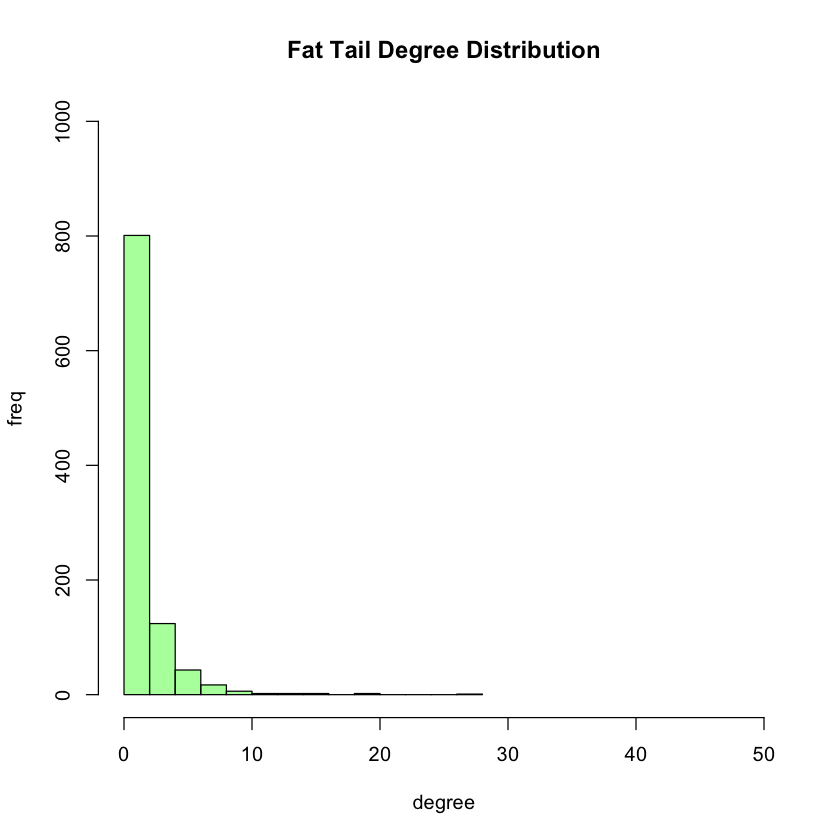

In [11]:
cluster <- clusters(fat_tail_network)
giant_component <- induced_subgraph(fat_tail_network, which(cluster$membership == which.max(cluster$csize)))
community_structure <- fastgreedy.community(giant_component)
modularity <- modularity(community_structure)

fat_tail_network <- barabasi.game(1000, directed = FALSE)
deg_ft <- degree(fat_tail_network)
hist(deg_ft, col=rgb(0,1,0,.4), xlim=c(0,50), ylim=c(0,1000), xlab="degree",ylab="freq", main="Fat Tail Degree Distribution")

diameter(fat_tail_network)